## Standardization

We try to bring all the variables or features to a similar scale. standardization means centering the variable at zero. z=(x-x_mean)/std

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Pclass,Age,Fare,Survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [4]:
df['Age']=df['Age'].fillna(df.Age.median())

In [5]:
df.head()

,Pclass,Age,Fare,Survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [6]:
df.isnull().sum()

Pclass      0
Age         0
Fare        0
Survived    0
dtype: int64

In [16]:
X=df.iloc[:,0:3]
y=df.iloc[:,3:]

In [17]:
X

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,28.0,23.4500
889,1,26.0,30.0000


In [18]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [20]:
X_train

,Pclass,Age,Fare
6,1,54.0,51.8625
718,3,28.0,15.5000
685,2,25.0,41.5792
73,3,26.0,14.4542
882,3,22.0,10.5167
...,...,...,...
106,3,21.0,7.6500
270,1,28.0,31.0000
860,3,41.0,14.1083
435,1,14.0,120.0000


In [21]:
X_test

,Pclass,Age,Fare
709,3,28.0,15.2458
439,2,31.0,10.5000
840,3,20.0,7.9250
720,2,6.0,33.0000
39,3,14.0,11.2417
...,...,...,...
715,3,19.0,7.6500
525,3,40.5,7.7500
381,3,1.0,15.7417
140,3,28.0,15.2458


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()
## fit vs fit_transform
X_train_scaled=scaler.fit_transform(X_train)

In [24]:
X_train_scaled

array([[-1.62580285,  1.91349292,  0.38784185],
       [ 0.80576177, -0.09452019, -0.31908053],
       [-0.41002054, -0.32621401,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636, -0.34613654],
       [-1.62580285, -1.17575802,  1.71250117],
       [-1.62580285, -0.63513911,  0.8821286 ]], shape=(596, 3))

In [26]:
X_test_scaled=scaler.transform(X_test)

In [27]:
X_test_scaled

array([[ 0.80576177, -0.09452019, -0.32402243],
       [-0.41002054,  0.13717363, -0.4162854 ],
       [ 0.80576177, -0.71237038, -0.46634591],
       [-0.41002054, -1.79360821,  0.0211365 ],
       [ 0.80576177, -1.17575802, -0.40186603],
       [-1.62580285, -0.24898274,  0.91250512],
       [ 0.80576177, -0.09452019, -0.46974808],
       [ 0.80576177, -1.02129548, -0.2704781 ],
       [ 0.80576177, -1.02129548, -0.46974808],
       [-1.62580285, -0.78960166, -0.10944269],
       [-1.62580285,  0.60056127,  0.41190006],
       [ 0.80576177,  1.14118018, -0.46391578],
       [ 0.80576177, -0.09452019, -0.12531819],
       [ 0.80576177,  0.05994235, -0.47995459],
       [-0.41002054,  0.52332999, -0.36768297],
       [-1.62580285, -1.02129548,  0.14555873],
       [-1.62580285,  0.98671764,  0.40128918],
       [ 0.80576177, -0.09452019, -0.46820835],
       [-0.41002054, -0.17175147, -0.36768297],
       [-1.62580285,  1.372874  ,  0.39051499],
       [ 0.80576177, -0.40344529, -0.466

In [28]:
### model Building
## fit() for training data and predict() for testing data

In [29]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()

In [30]:
classification.fit(X_train_scaled,y_train)

C:\Users\99895\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
y_pred=classification.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

In [36]:
classification.score(X_test_scaled,y_test)

0.7186440677966102

In [39]:
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(y_test,y_pred)

In [40]:
print(Accuracy)

0.7186440677966102


## ✅ 1. Classification Report

In [41]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       175
           1       0.74      0.47      0.58       120

    accuracy                           0.72       295
   macro avg       0.73      0.68      0.68       295
weighted avg       0.72      0.72      0.70       295



## ✅ 2. Confusion Matrix

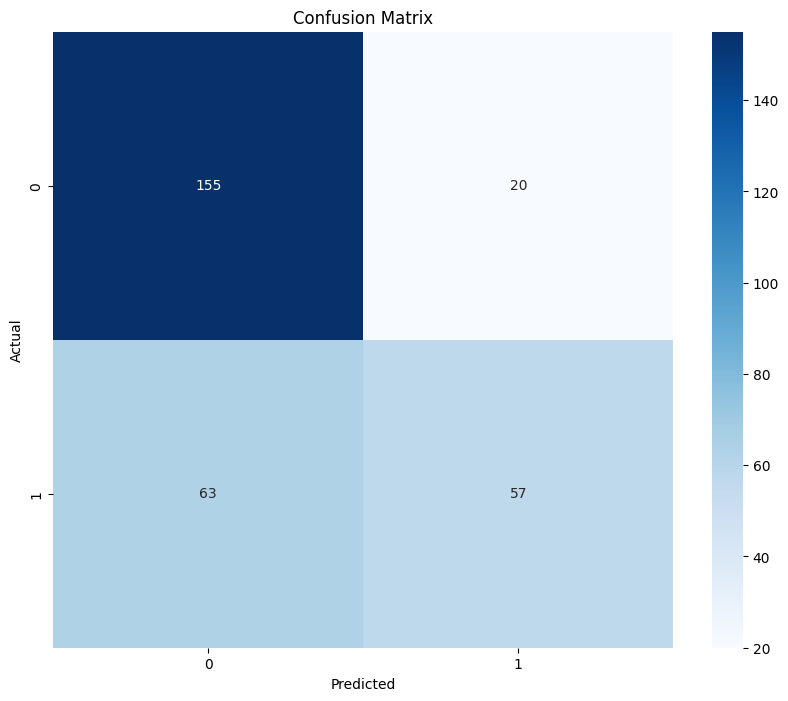

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## ✅ 3. ROC Curve (for binary classification)

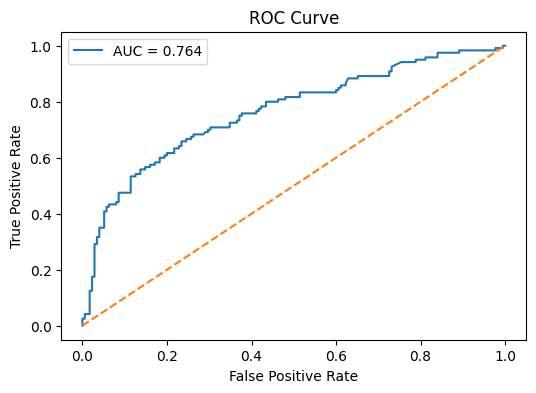

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probability of class = 1
y_prob = classification.predict_proba(X_test_scaled)[:, 1]

# Generate ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## ✔ Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# fix target shape
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)


Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [50]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [51]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7186440677966102


## ✅ Your model’s performance is stable
## But GridSearch did not significantly improve accuracy

## 🔍 Why accuracy didn't improve?

Possible reasons:

1. Feature set is very small

You are using only:

Pclass

Age

Fare

These three features cannot explain survival very well in the Titanic dataset.

2. Logistic Regression has limited modeling power

With only linear decision boundaries, it cannot capture complex patterns.

# 🚀 Want to Improve Accuracy?

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [53]:
rf = RandomForestClassifier(
    n_estimators=200,     # number of trees
    max_depth=None,      # allow trees to grow fully
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

rf.fit(X_train_scaled, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
y_pred = rf.predict(X_test_scaled)

In [55]:
acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", acc)

Random Forest Accuracy: 0.6847457627118644


In [56]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       175
           1       0.63      0.53      0.58       120

    accuracy                           0.68       295
   macro avg       0.67      0.66      0.66       295
weighted avg       0.68      0.68      0.68       295



In [57]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[138  37]
 [ 56  64]]


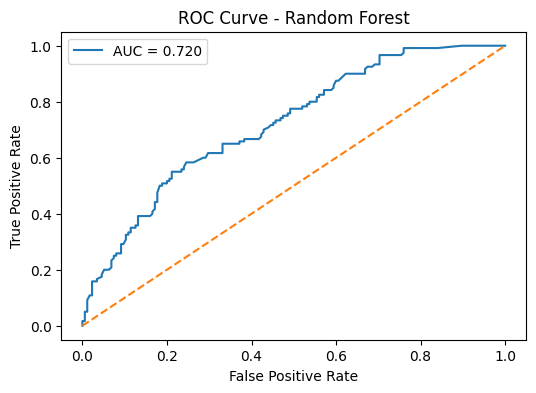

In [58]:
y_prob = rf.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="AUC = %.3f" % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


In [59]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

KeyError: 'Sex'

In [62]:
df = pd.read_csv("titanic.csv")

In [63]:
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [64]:
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

## 1. Encode Sex

In [65]:
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

## 2.Fill missing Age with median

In [67]:
X['Age'] = X['Age'].fillna(X['Age'].median())

## 3. Encode Embarked (One Hot Encoding)

In [68]:
X = pd.get_dummies(X, columns=['Embarked'], drop_first=True)

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

rf.fit(X_train_scaled, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [74]:
y_pred = rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.8100558659217877


In [75]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
[[89 16]
 [18 56]]


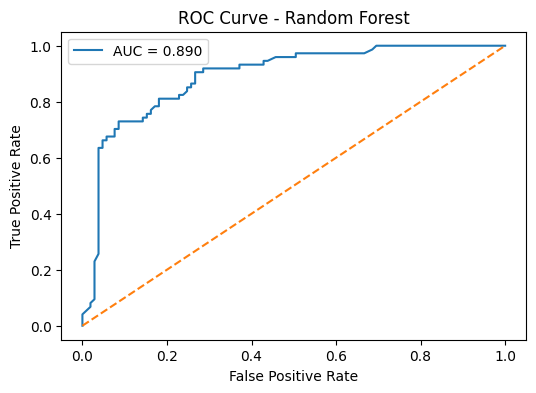

In [76]:
y_prob = rf.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="AUC = %.3f" % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


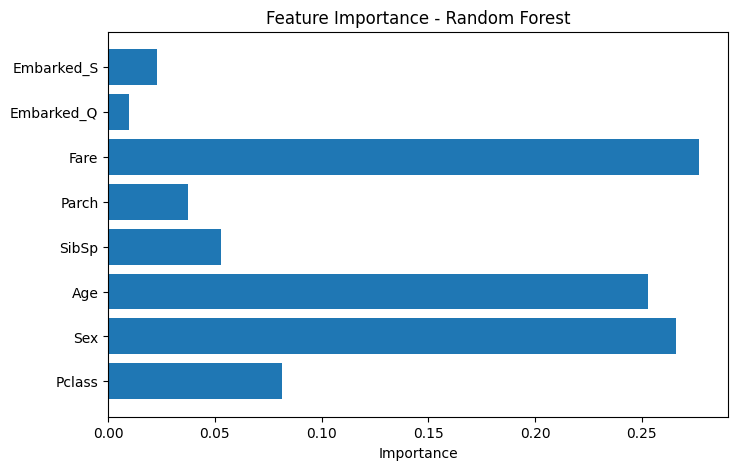

In [77]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.show()


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [79]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


In [80]:
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # use all cores
    verbose=2           # show progress
)


In [81]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [82]:
print("Best Parameters:", grid.best_params_)

best_rf = grid.best_estimator_

y_pred = best_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy after GridSearchCV:", accuracy)

Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Accuracy after GridSearchCV: 0.8100558659217877
